In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load dataset
data = pd.read_csv('insurance.csv')

In [3]:
data.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [4]:
#Check missing values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
datapoint = data[data.duplicated()]
datapoint

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = data.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

Check datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Check statistics of the dataset

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Insights

Age: 18–64, avg ~39 → middle-aged focus, charges rise with age.

BMI: avg ~30.6 (obese range), outliers up to 53 → higher BMI → higher charges.

Children: mostly 0–2 kids, up to 5 → small effect on charges.

Charges: avg ~13k, skewed right (few very high values ~64k).

👉 Main insight: older age, high BMI, and extreme cases (like smokers) drive up medical charges.

# Check Unique Values

In [11]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Exploring Data

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
print("Categores in sex: ", end=" ")
print(df['sex'].unique())

print("Categores in children: ", end=" ")
print(df['children'].unique())

print("Categores in smoker: ", end=" ")
print(df['smoker'].unique())

print("Categores in region: ", end=" ")
print(df['region'].unique())

Categores in sex:  ['female' 'male']
Categores in children:  [0 1 3 2 5 4]
Categores in smoker:  ['yes' 'no']
Categores in region:  ['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
# Get data splitted

num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
num_feature

['age', 'bmi', 'children', 'charges']

In [15]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
cat_features

['sex', 'smoker', 'region']

# Visualization

Understand Numerical Features

Univariate Analysis

In [16]:
import seaborn as sns

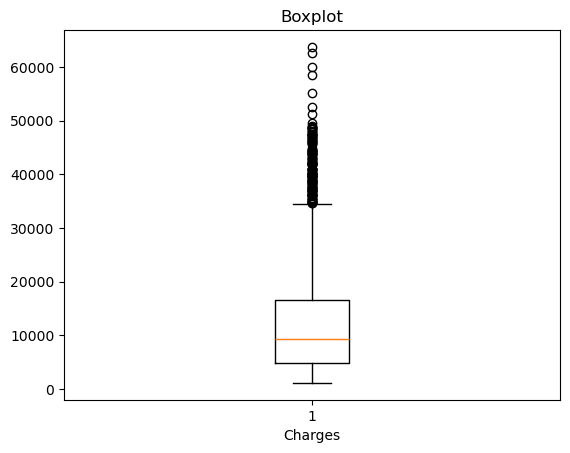

In [18]:
plt.boxplot(x=df['charges'])
plt.xlabel('Charges')
plt.title("Boxplot")
plt.show()

In [19]:
df[df['charges'] > 35000].head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


Observations

All are smokers → smoking is the strongest driver of high medical charges.

All have high BMI (>30 → obese) → obesity + smoking = huge risk factor.

Relatively young (22–34) → even though they’re not old, charges are still very high → lifestyle factors dominate.

Charges are 35K–40K → way above the 75th percentile (~16K).

Bivariate Analysis

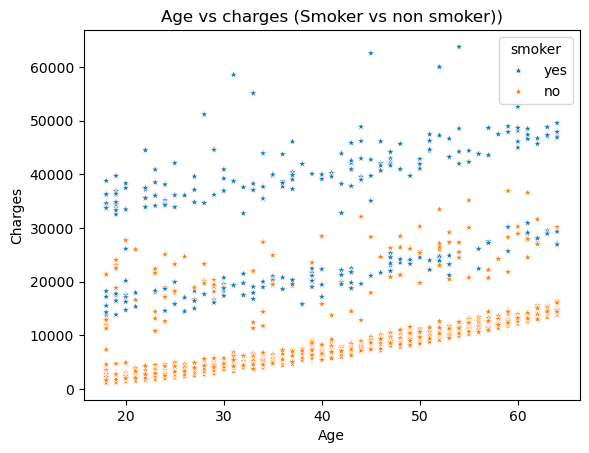

In [20]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, marker="*")
plt.title("Age vs charges (Smoker vs non smoker))")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

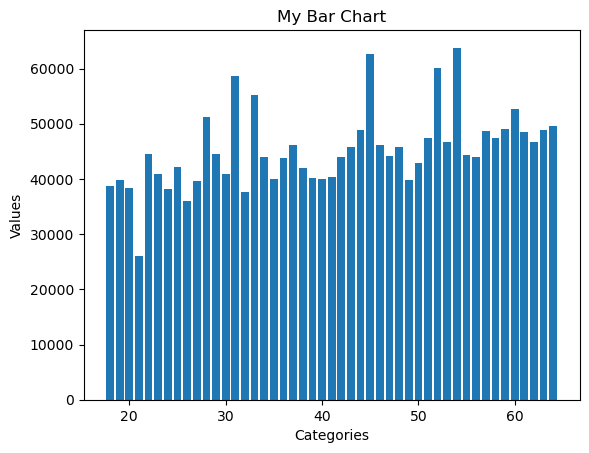

In [26]:
plt.bar(df['age'], df['charges'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('My Bar Chart')
plt.show()

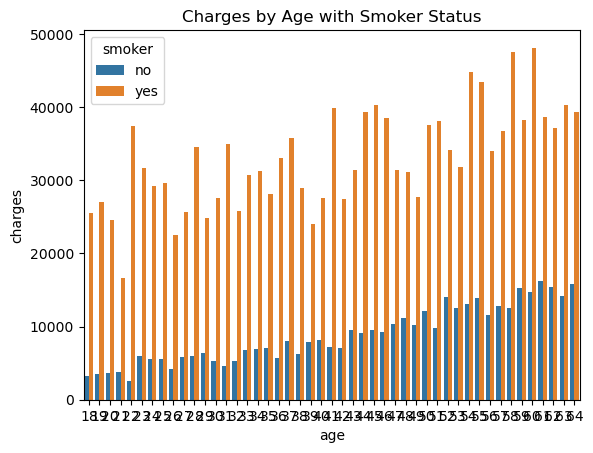

In [27]:
# Here we can see higher the bmi

sns.barplot(x='age', y='charges', hue='smoker', data=df, errorbar=None)
plt.title('Charges by Age with Smoker Status')
plt.show()

5. Conclusion

- Smoker status has the strongest impact on charges → smokers pay significantly higher medical costs compared to non-smokers.

- Age is positively related to charges → older individuals tend to have higher insurance costs.

- BMI is another key factor → overweight/obese individuals (BMI > 30) generally face higher charges.

- Gender does not significantly affect charges → males and females have similar cost distributions.

- Region has a minor effect → charges vary slightly across regions but not drastically.

- Number of children has little to no impact → family size does not strongly influence charges.